This Project is a sample for modeling interest rate prediction using a basic MLP neural network using Scikit Learn.  

The data comes from the US Treasury's Daily Treasury Yield found here: https://home.treasury.gov/resource-center/data-chart-center/interest-rates/TextView?type=daily_treasury_real_yield_curve&field_tdr_date_value_month=202309

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Read Data

In [2]:
# Read in the data
interest_rates = pd.read_csv(r"daily-treasury-rates.csv", parse_dates=['Date'])

Review Data

In [3]:
interest_rates.head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2023-09-08,5.52,5.56,5.55,5.60,5.49,5.42,4.98,4.68,4.39,4.35,4.26,4.52,4.33
1,2023-09-07,5.52,5.56,5.53,5.59,5.50,5.40,4.94,4.66,4.38,4.35,4.27,4.55,4.36
2,2023-09-06,5.52,5.55,5.55,5.60,5.52,5.44,5.01,4.73,4.44,4.39,4.30,4.56,4.37
3,2023-09-05,5.51,5.56,5.55,5.59,5.51,5.42,4.94,4.65,4.37,4.35,4.27,4.56,4.38
4,2023-09-01,5.51,5.55,5.53,5.58,5.47,5.36,4.87,4.57,4.29,4.27,4.18,4.48,4.29


Drop Missing Values

In [4]:
interest_rates = interest_rates.dropna(axis = 1)

Sort Data

In [5]:
interest_rates = interest_rates.sort_values(by=['Date'], ascending=True)

Set Lookback Size

In [6]:
lookback_size = 90

Stack Data into Batches

In [7]:
stacked_rates = interest_rates.iloc[: lookback_size, 1:].to_numpy().reshape(-1, lookback_size, interest_rates.shape[-1] - 1)
for i in range(1, len(interest_rates) - lookback_size):
    stacked_rates = np.append(stacked_rates, interest_rates.iloc[i: i + lookback_size, 1:].to_numpy().reshape(-1, lookback_size, interest_rates.shape[-1] - 1), axis = 0)

Prepare Data and Outcomes for Modeling

In [14]:
outcome_rates = interest_rates.iloc[lookback_size:, 1:].to_numpy()#.reshape(-1, 1, interest_rates.shape[-1] - 1)

In [27]:
stacked_rates = stacked_rates.reshape(outcome_rates.shape[0], -1)

Fit a linear MLP regressor

In [28]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100, 100, 100), max_iter=1000, verbose=True, random_state=42)
model.fit(stacked_rates, outcome_rates)

Iteration 1, loss = 0.63075297
Iteration 2, loss = 0.06620008
Iteration 3, loss = 0.03217431
Iteration 4, loss = 0.02233269
Iteration 5, loss = 0.01710140
Iteration 6, loss = 0.01483538
Iteration 7, loss = 0.01359208
Iteration 8, loss = 0.01205556
Iteration 9, loss = 0.01151105
Iteration 10, loss = 0.01065649
Iteration 11, loss = 0.01186488
Iteration 12, loss = 0.01131676
Iteration 13, loss = 0.00972033
Iteration 14, loss = 0.00862223
Iteration 15, loss = 0.00865605
Iteration 16, loss = 0.00898879
Iteration 17, loss = 0.00769829
Iteration 18, loss = 0.00849712
Iteration 19, loss = 0.00788851
Iteration 20, loss = 0.00711251
Iteration 21, loss = 0.00704197
Iteration 22, loss = 0.00723000
Iteration 23, loss = 0.00636154
Iteration 24, loss = 0.00661860
Iteration 25, loss = 0.00626876
Iteration 26, loss = 0.00619958
Iteration 27, loss = 0.00664597
Iteration 28, loss = 0.00682055
Iteration 29, loss = 0.00542069
Iteration 30, loss = 0.00523043
Iteration 31, loss = 0.00555357
Iteration 32, los

MLPRegressor(hidden_layer_sizes=(100, 100, 100), max_iter=1000, random_state=42,
             verbose=True)

Evaluate the performance of the MLP Regressor

In [31]:
model.score(stacked_rates, outcome_rates)

0.9898591951731407

Plot the predictions of the MLP regressor against the actual interest rate data

In [32]:
predictions = model.predict(stacked_rates)

Text(0.5, 1.0, 'Actual vs Predicted Interest Rates')

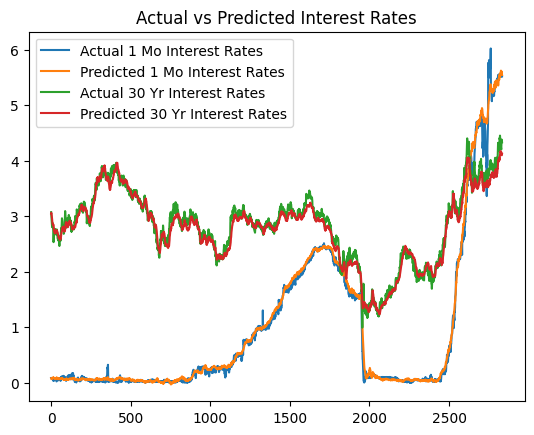

In [33]:
pd.DataFrame(
    {
        "Actual 1 Mo Interest Rates": outcome_rates[:, 0],
        "Predicted 1 Mo Interest Rates": predictions[:, 0],
        "Actual 30 Yr Interest Rates": outcome_rates[:, -1],
        "Predicted 30 Yr Interest Rates": predictions[:, -1],
    }
).plot()
plt.title("Actual vs Predicted Interest Rates")